In [1]:
# import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder


In [2]:
sns.set(font_scale=1.5)

In [3]:
# read the cleaned dataset
df = pd.read_csv( "data/clean.csv" )

#### Preliminary exploration

In [4]:
# check for the new shape and columns
df.shape, df.columns

((196, 14),
 Index(['index', 'sub_area', 'n_bhk', 'surface', 'price', 'company_name',
        'township', 'club_house', 'school', 'hospital', 'mall', 'park', 'pool',
        'gym'],
       dtype='object'))

In [5]:
 # check for the unique values
df["company_name"].unique(), df["township"].unique()

(array(['shapoorji paloonji', 'godrej properties', 'anp corp',
        'urban space creator', 'vtp reality', 'waghvani constructions',
        'sukwani associates', 'mantra properties', 'ravima ventures',
        'proviso group', 'unique properties', 'sagitarius ecospaces llp',
        'nirman developers', 'jhala group', 'shroff developers',
        'kundan spaces', 'venkatesh bhoomi construction', 'lush life',
        'maha anand pinnac associates', 'vasupujya corporation',
        'ace constructions', 'wellwisher apartments', 'dolphin group',
        'oxy buildcorp', 'kohinoor group', 'bhaktamar realities',
        'porwal & anand develkoper', 'porwal  develkoper',
        'keystone landmark', 'puraniks', 'majestique landmarks',
        'kalpataru', 'vijaya laxmi creations',
        'vijaya laxmi infrarealtors', 'calyx spaces', 'supreme',
        'tejraaj group'], dtype=object),
 array(['vanaha', 'godrej hills retreat', 'anp universe', 'urban skyline',
        'vtp cierra', 'vtp blue

In [6]:
# drop the columns
df = df.drop(columns=["index", "company_name", "township"]).drop_duplicates()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 0 to 195
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sub_area    196 non-null    object 
 1   n_bhk       196 non-null    float64
 2   surface     196 non-null    float64
 3   price       196 non-null    float64
 4   club_house  196 non-null    object 
 5   school      196 non-null    object 
 6   hospital    196 non-null    object 
 7   mall        196 non-null    object 
 8   park        196 non-null    object 
 9   pool        196 non-null    object 
 10  gym         196 non-null    object 
dtypes: float64(3), object(8)
memory usage: 18.4+ KB


In [8]:
df.tail(10)

,sub_area,n_bhk,surface,price,club_house,school,hospital,mall,park,pool,gym
186,bavdhan,2.0,665.0,6.499,yes,no,no,no,yes,no,no
187,talegoan,1.0,280.0,1.319,yes,no,no,no,yes,yes,yes
188,talegoan,2.0,385.0,1.729,yes,no,no,no,yes,no,yes
189,baner,2.0,730.0,8.700,yes,no,no,no,yes,yes,yes
190,baner,3.0,1135.0,12.900,yes,no,no,no,yes,yes,yes
191,baner,3.0,1350.0,16.000,yes,no,no,no,yes,yes,yes
192,baner,4.0,1600.0,23.000,yes,no,no,no,yes,yes,yes
193,baner,2.0,789.0,9.500,no,no,no,no,yes,yes,yes
194,baner,3.0,1107.0,13.500,no,no,no,no,yes,yes,yes
195,baner,2.0,776.0,9.068,yes,no,no,no,yes,yes,yes


## Converting binary columns to dummy variables

In [9]:
# Selecting the binary columns
binary_cols = df.iloc[:, 4:].columns.to_list()
binary_cols


['club_house', 'school', 'hospital', 'mall', 'park', 'pool', 'gym']

In [10]:
# average price for apartments with and without swimming pool
df[["price", "pool"]].groupby("pool")["price"].mean()

pool
no      6.456944
yes    10.000323
Name: price, dtype: float64

In [11]:
# Transforming the yes/no to 1/0
laben = LabelEncoder()
for col in binary_cols:
    df[col] = laben.fit_transform(df[col])
    
df.tail(10)


,sub_area,n_bhk,surface,price,club_house,school,hospital,mall,park,pool,gym
186,bavdhan,2.0,665.0,6.499,1,0,0,0,1,0,0
187,talegoan,1.0,280.0,1.319,1,0,0,0,1,1,1
188,talegoan,2.0,385.0,1.729,1,0,0,0,1,0,1
189,baner,2.0,730.0,8.700,1,0,0,0,1,1,1
190,baner,3.0,1135.0,12.900,1,0,0,0,1,1,1
191,baner,3.0,1350.0,16.000,1,0,0,0,1,1,1
192,baner,4.0,1600.0,23.000,1,0,0,0,1,1,1
193,baner,2.0,789.0,9.500,0,0,0,0,1,1,1
194,baner,3.0,1107.0,13.500,0,0,0,0,1,1,1
195,baner,2.0,776.0,9.068,1,0,0,0,1,1,1


## Sub areas contribution

In [12]:
# Contribution of different sub-areas on the dataset 
df_sa_count = df.groupby("sub_area")["price"].count().reset_index()\
                .rename(columns={"price":"count"})\
                .sort_values("count", ascending=False)\
                .reset_index(drop=True)
df_sa_count["sa_contribution"] = df_sa_count["count"]/len(df)
df_sa_count

,sub_area,count,sa_contribution
0,kharadi,16,0.081633
1,baner,12,0.061224
2,ravet,12,0.061224
3,handewadi,11,0.056122
4,bavdhan,10,0.051020
5,bt kawade rd,10,0.051020
6,wadgaon sheri,9,0.045918
7,hinjewadi,9,0.045918
8,mahalunge,9,0.045918
9,hadapsar,8,0.040816


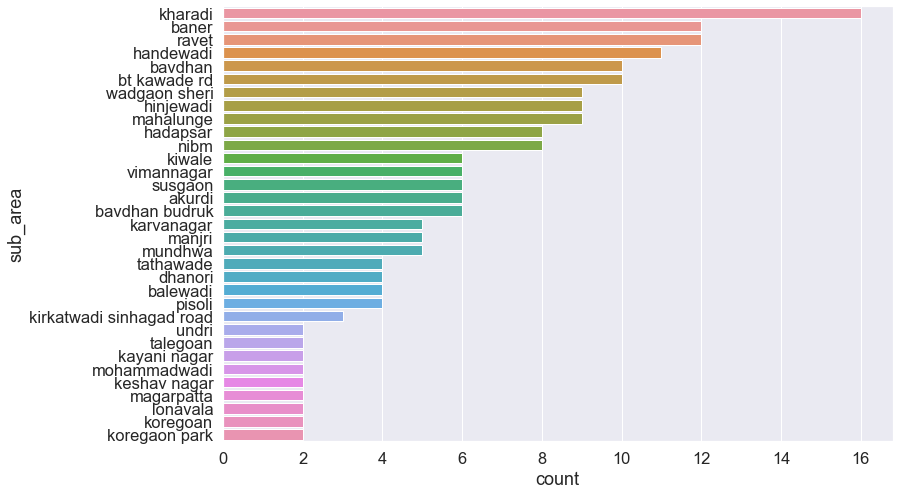

In [13]:
# Distribution of sub-areas contribution 
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=df_sa_count, x="count", y="sub_area", ax=ax)
plt.show()


In [14]:
len(df_sa_count), np.mean(df_sa_count["count"])

(33, 5.9393939393939394)

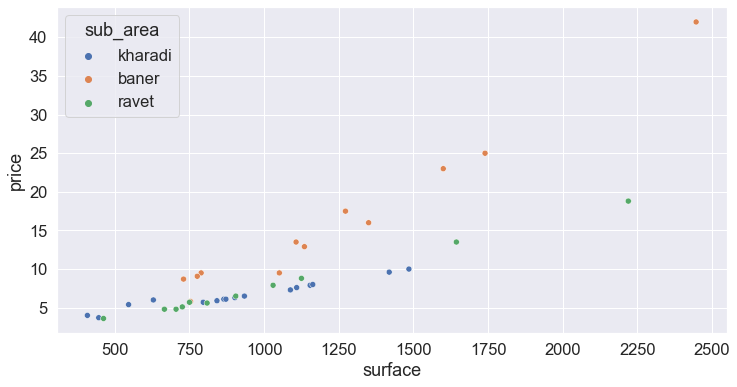

In [15]:
# Price vs surface for the first three most contribuions
fig, ax = plt.subplots(figsize=(12, 6))
df_plot = df_sa_count.merge( df[["sub_area", "surface", "price"]], on="sub_area")
df_plot = df_plot[df_plot["count"]>11]

sns.scatterplot(data=df_plot, x="surface", y="price", hue="sub_area")
plt.show()



In [16]:
# Feature engineering
sa_sel_col = df_sa_count.loc[df_sa_count["count"]>7, "sub_area"].to_list()
df["sub_area"] = df["sub_area"].where(df["sub_area"].isin(sa_sel_col), "other")

In [17]:
df["sub_area"].unique(), len(df["sub_area"].unique())

(array(['bavdhan', 'mahalunge', 'other', 'ravet', 'baner', 'kharadi',
        'hadapsar', 'handewadi', 'nibm', 'bt kawade rd', 'hinjewadi',
        'wadgaon sheri'], dtype=object),
 12)

#### Converting Sub-Area to dummy variables

In [18]:
# Dummy variable conversion
hoten = OneHotEncoder(sparse=False)
X_dummy = hoten.fit_transform( df[["sub_area"]] )
X_dummy.shape, X_dummy, X_dummy.dtype

C:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


((196, 12),
 array([[0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]]),
 dtype('float64'))

In [19]:
# Type conversion
X_dummy = X_dummy.astype("int64")


In [20]:
# Adding the dummy columns to the dataset
sa_cols_name = ["sa"+str(i+1) for i in range(X_dummy.shape[1])]
df.loc[:,sa_cols_name] = X_dummy
df.head()

,sub_area,n_bhk,surface,price,club_house,school,hospital,mall,park,pool,...,sa3,sa4,sa5,sa6,sa7,sa8,sa9,sa10,sa11,sa12
0,bavdhan,1.0,492.0,3.9,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,bavdhan,2.0,774.0,6.5,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,bavdhan,3.0,889.0,7.4,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,bavdhan,3.0,1018.0,8.9,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,mahalunge,2.0,743.0,7.4,1,1,1,1,1,1,...,0,0,0,0,0,1,0,0,0,0


In [21]:
# Sub_area and dummy columns relationship 
df[["sub_area"]+sa_cols_name].drop_duplicates()\
            .sort_values("sub_area").reset_index(drop=True)

,sub_area,sa1,sa2,sa3,sa4,sa5,sa6,sa7,sa8,sa9,sa10,sa11,sa12
0,baner,1,0,0,0,0,0,0,0,0,0,0,0
1,bavdhan,0,1,0,0,0,0,0,0,0,0,0,0
2,bt kawade rd,0,0,1,0,0,0,0,0,0,0,0,0
3,hadapsar,0,0,0,1,0,0,0,0,0,0,0,0
4,handewadi,0,0,0,0,1,0,0,0,0,0,0,0
5,hinjewadi,0,0,0,0,0,1,0,0,0,0,0,0
6,kharadi,0,0,0,0,0,0,1,0,0,0,0,0
7,mahalunge,0,0,0,0,0,0,0,1,0,0,0,0
8,nibm,0,0,0,0,0,0,0,0,1,0,0,0
9,other,0,0,0,0,0,0,0,0,0,1,0,0


## Univariate and bivariate analyses

In [22]:
# check only object datatype columns
data = df.select_dtypes(exclude="object")

In [23]:
data.head()

,n_bhk,surface,price,club_house,school,hospital,mall,park,pool,gym,...,sa3,sa4,sa5,sa6,sa7,sa8,sa9,sa10,sa11,sa12
0,1.0,492.0,3.9,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2.0,774.0,6.5,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,889.0,7.4,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,3.0,1018.0,8.9,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,743.0,7.4,1,1,1,1,1,1,1,...,0,0,0,0,0,1,0,0,0,0


In [24]:
data.describe()

,n_bhk,surface,price,club_house,school,hospital,mall,park,pool,gym,...,sa3,sa4,sa5,sa6,sa7,sa8,sa9,sa10,sa11,sa12
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,...,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,2.385204,893.321429,8.698673,0.739796,0.030612,0.030612,0.030612,0.979592,0.632653,0.806122,...,0.051020,0.040816,0.056122,0.045918,0.081633,0.045918,0.040816,0.418367,0.061224,0.045918
std,0.847824,376.080650,5.807492,0.439869,0.172706,0.172706,0.172706,0.141754,0.483317,0.396346,...,0.220603,0.198371,0.230747,0.209844,0.274505,0.209844,0.198371,0.494554,0.240356,0.209844
min,1.000000,113.000000,1.319000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,670.000000,5.100000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,794.500000,7.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1041.250000,9.746750,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,6.000000,2447.000000,46.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Continous variables

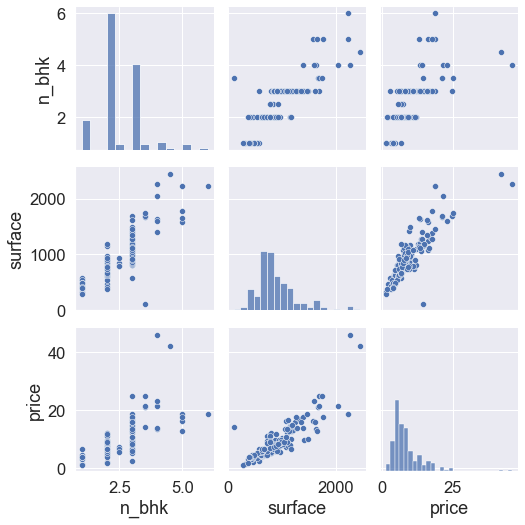

In [25]:
float_cols = data.select_dtypes( include="float" ).columns.to_list()
sns.pairplot( data[float_cols] )
plt.show()

#### Binary variables

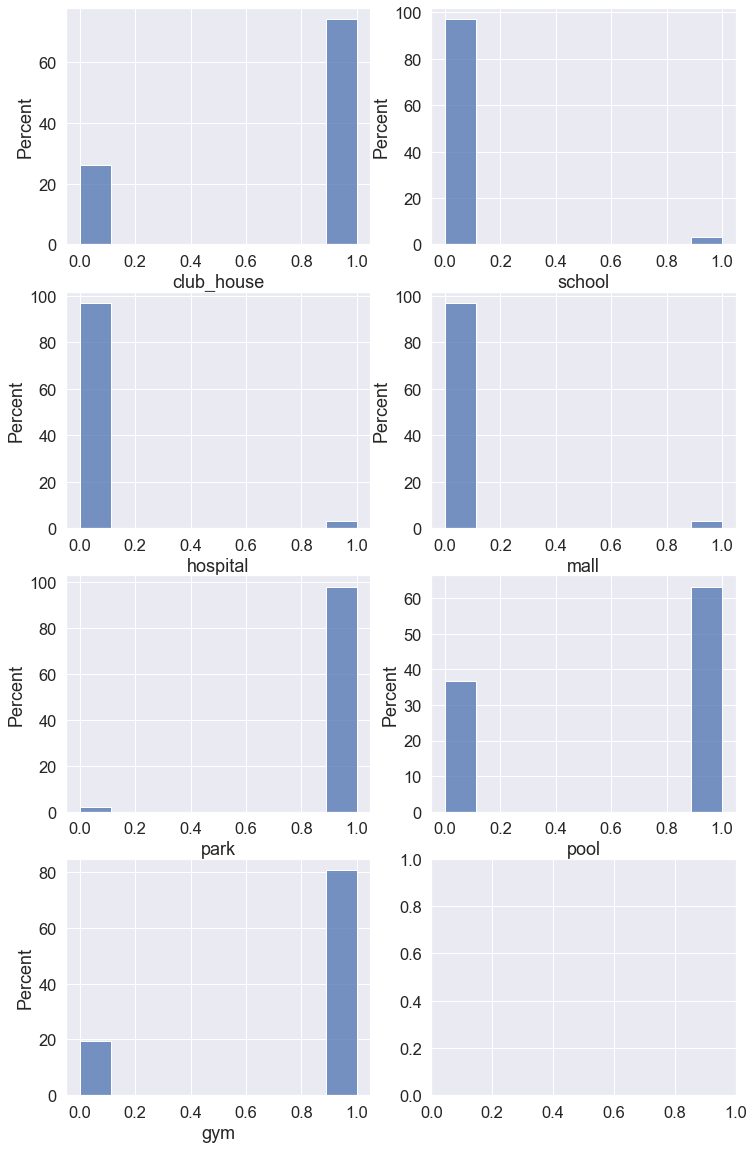

In [26]:
fig, ax = plt.subplots(4,2, figsize=(12,20))
for i, col in enumerate(binary_cols):
    sns.histplot(data, x=col, ax=ax[int(i/2), i%2], stat="percent")

#### Correlation map

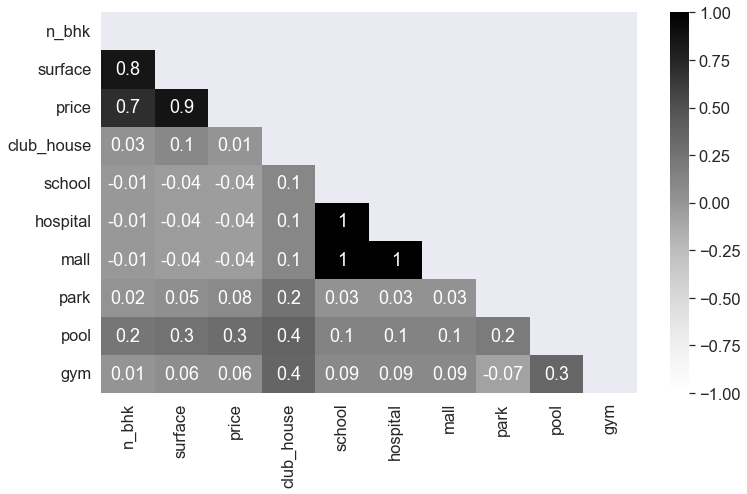

In [27]:
corr_cols_list = float_cols+binary_cols
correl = data[corr_cols_list].corr()
mask = np.zeros_like(correl )

mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots( figsize=(12,7) )
sns.heatmap(correl, mask=mask, vmin=-1, cmap='Greys', 
            annot=True, fmt='.1g')
plt.show()

## Feature selection

In [28]:
# Price correlation with all other columns
corr_cols_list.remove("price")
corr_cols_list.extend(sa_cols_name)
corr_list = [] # to keep the correlations with price
for col in corr_cols_list:
    corr_list.append( round(data["price"].corr(data[col]),2) )    

corr_list

[0.7,
 0.86,
 0.01,
 -0.04,
 -0.04,
 -0.04,
 0.08,
 0.29,
 0.06,
 0.32,
 -0.12,
 0.08,
 -0.04,
 -0.17,
 0.0,
 -0.11,
 -0.05,
 0.23,
 -0.02,
 -0.0,
 -0.07]

In [29]:
# Sorted correlations
df_corr = pd.DataFrame( data=zip(corr_cols_list, corr_list), 
                 columns=["col_name", "corr"] )\
            .sort_values("corr", ascending=False)\
            .reset_index(drop=True)
df_corr

,col_name,corr
0,surface,0.86
1,n_bhk,0.70
2,sa1,0.32
3,pool,0.29
4,sa9,0.23
5,sa3,0.08
6,park,0.08
7,gym,0.06
8,club_house,0.01
9,sa11,-0.00


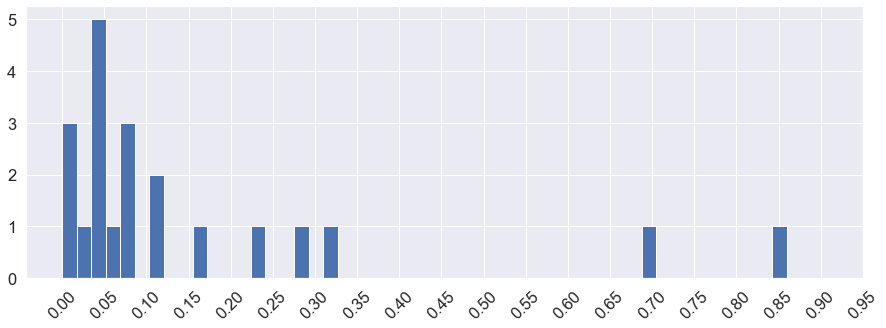

In [30]:
# Distribution of correlations with price 
fig, ax = plt.subplots(figsize=(15,5))
abs(df_corr["corr"]).hist(bins=50)
ax.set_xticks(np.arange(0, 1, 0.05))
plt.xticks(rotation=45)
plt.show()

In [31]:
features = df_corr.loc[abs(df_corr["corr"])>.1, "col_name"].to_list() 
features, len(features)

(['surface', 'n_bhk', 'sa1', 'pool', 'sa9', 'sa7', 'sa2', 'sa5'], 8)

In [32]:
# Keeping the sub areas' name, their mean price and frequency (count)
sa_feature_list = [sa for sa in features if "sa" in sa]
lst = []
for col in sa_feature_list:
    sa_triger = df[col]==1
    sa = df.loc[sa_triger, "sub_area"].to_list()[0]
    x = df.loc[sa_triger, "price"]
    lst.append( (sa, np.mean(x), df[col].sum()) )

lst


[('baner', 16.039, 12),
 ('nibm', 15.100000000000001, 8),
 ('kharadi', 6.631062499999999, 16),
 ('bavdhan', 5.8044, 10),
 ('handewadi', 4.568818181818181, 11)]

In [33]:
# sub area mean price comparision 
sa_f = pd.DataFrame(lst, columns=["sub_area","mean_price", "count"])
sa_f["total_mean_price"] = np.mean(df["price"])
sa_f

,sub_area,mean_price,count,total_mean_price
0,baner,16.039000,12,8.698673
1,nibm,15.100000,8,8.698673
2,kharadi,6.631062,16,8.698673
3,bavdhan,5.804400,10,8.698673
4,handewadi,4.568818,11,8.698673


## Data scalling

In [34]:
# Selection the final dataset
sel_data = data[features+["price"]].copy()
sel_data.head()

,surface,n_bhk,sa1,pool,sa9,sa7,sa2,sa5,price
0,492.0,1.0,0,1,0,0,1,0,3.9
1,774.0,2.0,0,1,0,0,1,0,6.5
2,889.0,3.0,0,1,0,0,1,0,7.4
3,1018.0,3.0,0,1,0,0,1,0,8.9
4,743.0,2.0,0,1,0,0,0,0,7.4


In [35]:
# Standard scaling for surface
sc = StandardScaler(with_std=True, with_mean=True)
sel_data["surface"] = sc.fit_transform(sel_data[["surface"]])


In [36]:
# Showing the final datset
sel_data

,surface,n_bhk,sa1,pool,sa9,sa7,sa2,sa5,price
0,-1.069848,1.0,0,1,0,0,1,0,3.900
1,-0.318089,2.0,0,1,0,0,1,0,6.500
2,-0.011520,3.0,0,1,0,0,1,0,7.400
3,0.332370,3.0,0,1,0,0,1,0,8.900
4,-0.400729,2.0,0,1,0,0,0,0,7.400
...,...,...,...,...,...,...,...,...,...
191,1.217420,3.0,1,1,0,0,0,0,16.000
192,1.883873,4.0,1,1,0,0,0,0,23.000
193,-0.278101,2.0,1,1,0,0,0,0,9.500
194,0.569627,3.0,1,1,0,0,0,0,13.500


## Saving the data

In [37]:
# save the new data
sel_data.to_csv("data/features.csv", index=False)